In [4]:
from DigitalModulations import DigitalModulationDataset, DigitalDemodulationDataset
from TransformsRF import * #transforms
import torchvision
import torch
import numpy as np

C:\Users\cgzog\Python_Projects\DieselWolf\Dataset\DigitalModulations.py:126: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\Users\builder\tkoch\workspace\pytorch\pytorch_1647970138273\work\torch\csrc\utils\tensor_new.cpp:201.)
  data = torch.tensor(examp[-1])


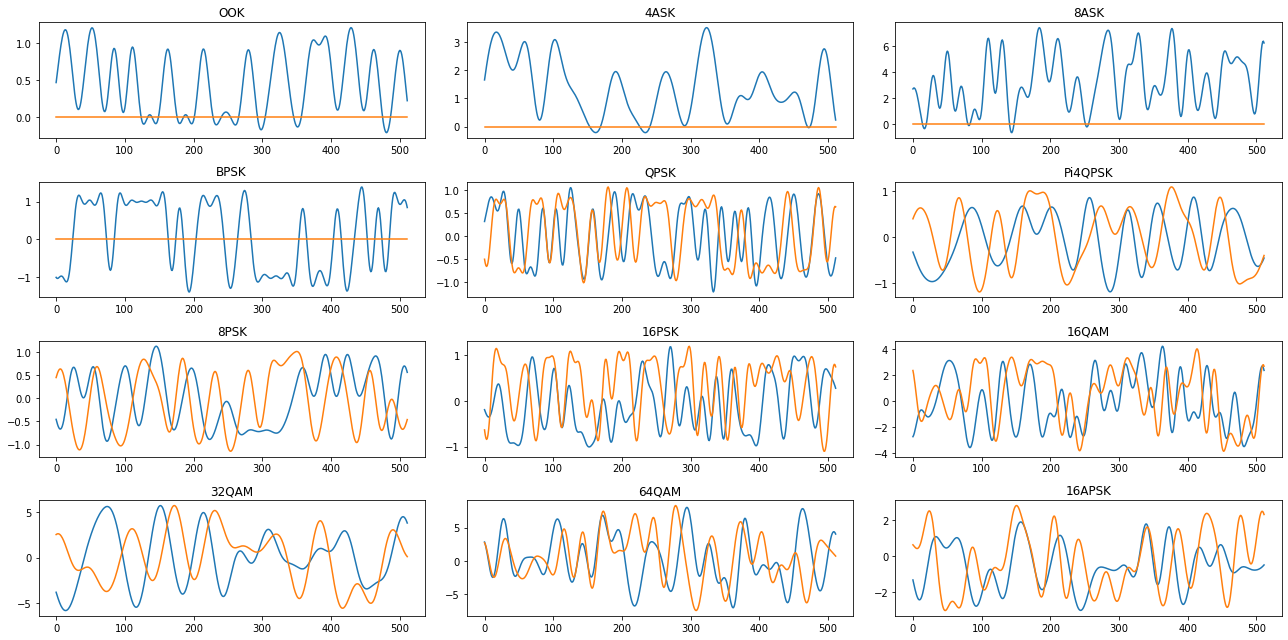

In [2]:
#Quick Test
import matplotlib.pyplot as plt

channel = torchvision.transforms.Compose([Random_Fading(0.1,2.0),RandomCarrierFrequency(.01),RandomAWGN(0,40),
                                                 Normalize_Amplitude(amp=2)])
testset = DigitalModulationDataset(1,num_samples=512,transform=None)

fig,ax = plt.subplots(4,3,figsize=(18,9))
for i,a,t in zip(np.arange(0,12,1),ax.ravel(),testset.classes):
    a.plot(testset.__getitem__(i)['data'][0])
    a.plot(testset.__getitem__(i)['data'][1])
    a.set_title(t)
plt.tight_layout()
plt.show()

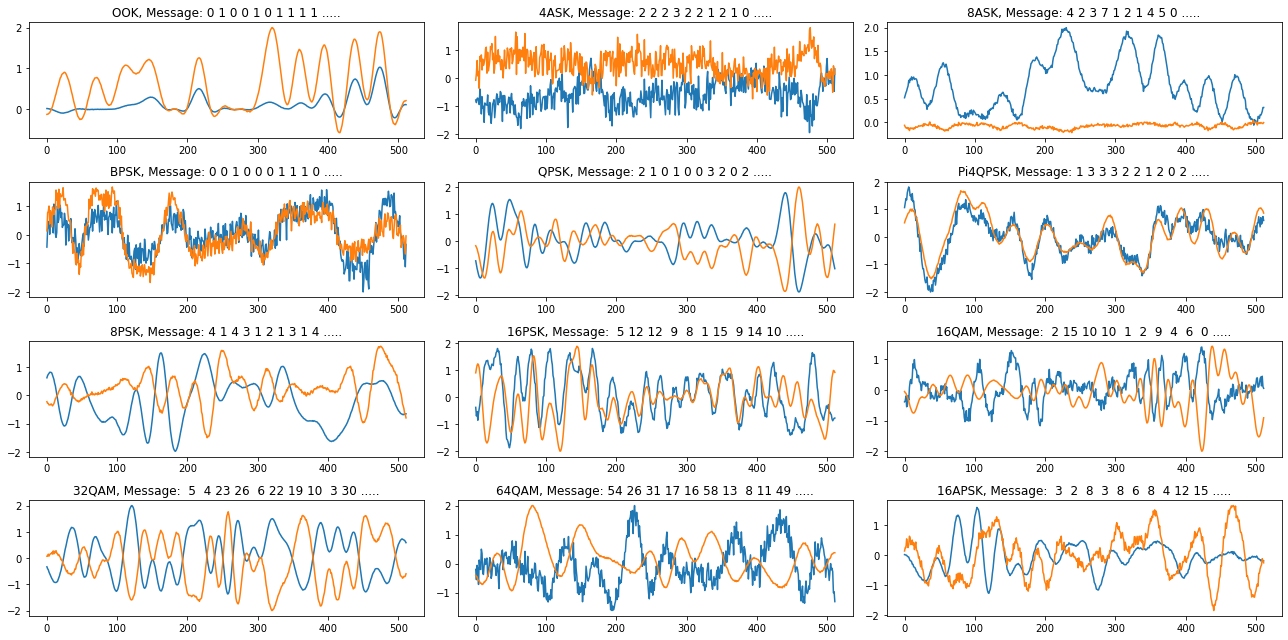

In [3]:
#Quick Test
import matplotlib.pyplot as plt

channel = torchvision.transforms.Compose([Random_Amplitude_Fading(0.1,2.0),RandomCarrierFrequency(.01),RandomAWGN(0,40),
                                                 Normalize_Amplitude(amp=2)])
testset = DigitalDemodulationDataset(1,num_samples=512,transform=channel)

fig,ax = plt.subplots(4,3,figsize=(18,9))
for i,a,t in zip(np.arange(0,12,1),ax.ravel(),testset.classes):
    a.plot(testset.__getitem__(i)['data'][0])
    a.plot(testset.__getitem__(i)['data'][1])
    a.set_title(t + ', Message: ' + str(testset.__getitem__(i)['message'][0:10])[1:-1] + ' .....')
plt.tight_layout()
plt.show()